In [ ]:
#numpy.fft.rfft() & numpy,fft.irfft() for real data
#numpy.fft.fft() & numpy.fft.ifft() for both real and complex

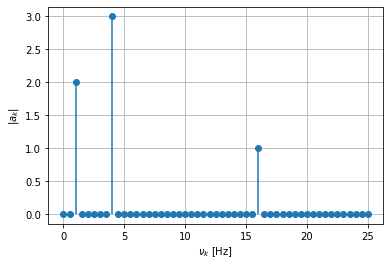

In [1]:
import numpy as np

def dft_sample_points(T: float, N: int) -> np.ndarray:
    # numpy.arange(N) returns array([0, 1, ..., N - 1])
    return np.arange(N) * T / N
import numpy as np

def fourier_complex_to_real(complex_coeffs, N):
    """
    Converts complex-valued Fourier coefficients (of
    real-valued data) to the associated amplitudes and
    phase-shifts of the real-valued sinusoids

    Parameters
    ----------
    complex_coeffs : numpy.ndarray, shape-(N//2 + 1,)
        The complex valued Fourier coefficients for k=0, 1, ...

    N : int
        The number of samples that the DFT was performed on.

    Returns
    -------
    Tuple[numpy.ndarray, numpy.ndarray]
        (amplitudes, phase-shifts)
        Two real-valued, shape-(N//2 + 1,) arrays
    """
    amplitudes = np.abs(complex_coeffs) / N

    # |a_k| = 2 |c_k| / N for all k except for
    # k=0 and k=N/2 (only if N is even)
    # where |a_k| = |c_k| / N
    amplitudes[1 : (-1 if N % 2 == 0 else None)] *= 2

    phases = np.arctan2(-complex_coeffs.imag, complex_coeffs.real)
    return amplitudes, phases
#`dft_sample_points` is from the "Type-1 DFT Sampling" reading comprehension
# `fourier_complex_to_real` is from the "Converting  c_k  to  a_k" reading comprehension

import matplotlib.pyplot as plt
%matplotlib inline


def f(t):
    return sum(amp * np.sin(2 * np.pi * freq * t) for amp, freq in zip((2, 3, 1), (1, 4, 16)))


N = 100
T = 2  # units: seconds


# sample at t_n = n/N * T; n = 0, 1, ..., N-1
times = dft_sample_points(T=T, N=N)

# evaluate function at sampled times
samples = f(times)

# perform FFT on real-valued data
ck = np.fft.rfft(samples) # N//2 + 1 complex-valued coeffs


# convert each c_k to |a_k| and phi_k
amps, phases = fourier_complex_to_real(ck, N=N)

# k=0, 1, ..., N//2 -> freq=0/T, 1/T, ..., (N//2)/T
freqs = np.arange(len(ck)) / T  # convert k to freq (Hz)

fig, ax = plt.subplots()

# plot |a_k| vs freq
ax.stem(freqs, amps, use_line_collection=True, basefmt=" ")

ax.set_xlabel(r"$\nu_k$ [Hz]")
ax.set_ylabel(r"$|a_k|$")
ax.grid(True);